In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Diabetese Model Training

In [4]:
dataset=pd.read_csv("diabetes (1).csv")
dataset.shape

(768, 8)

In [5]:
dataset

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [6]:
#check for null values
dataset.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
s=dataset.groupby('Outcome').mean()
s

Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
Outcome                                                                    
0        109.980000      68.184000      19.664000   68.792000  30.304200   
1        141.257463      70.824627      22.164179  100.335821  35.142537   

         DiabetesPedigreeFunction        Age  
Outcome                                       
0                        0.429734  31.190000  
1                        0.550500  37.067164

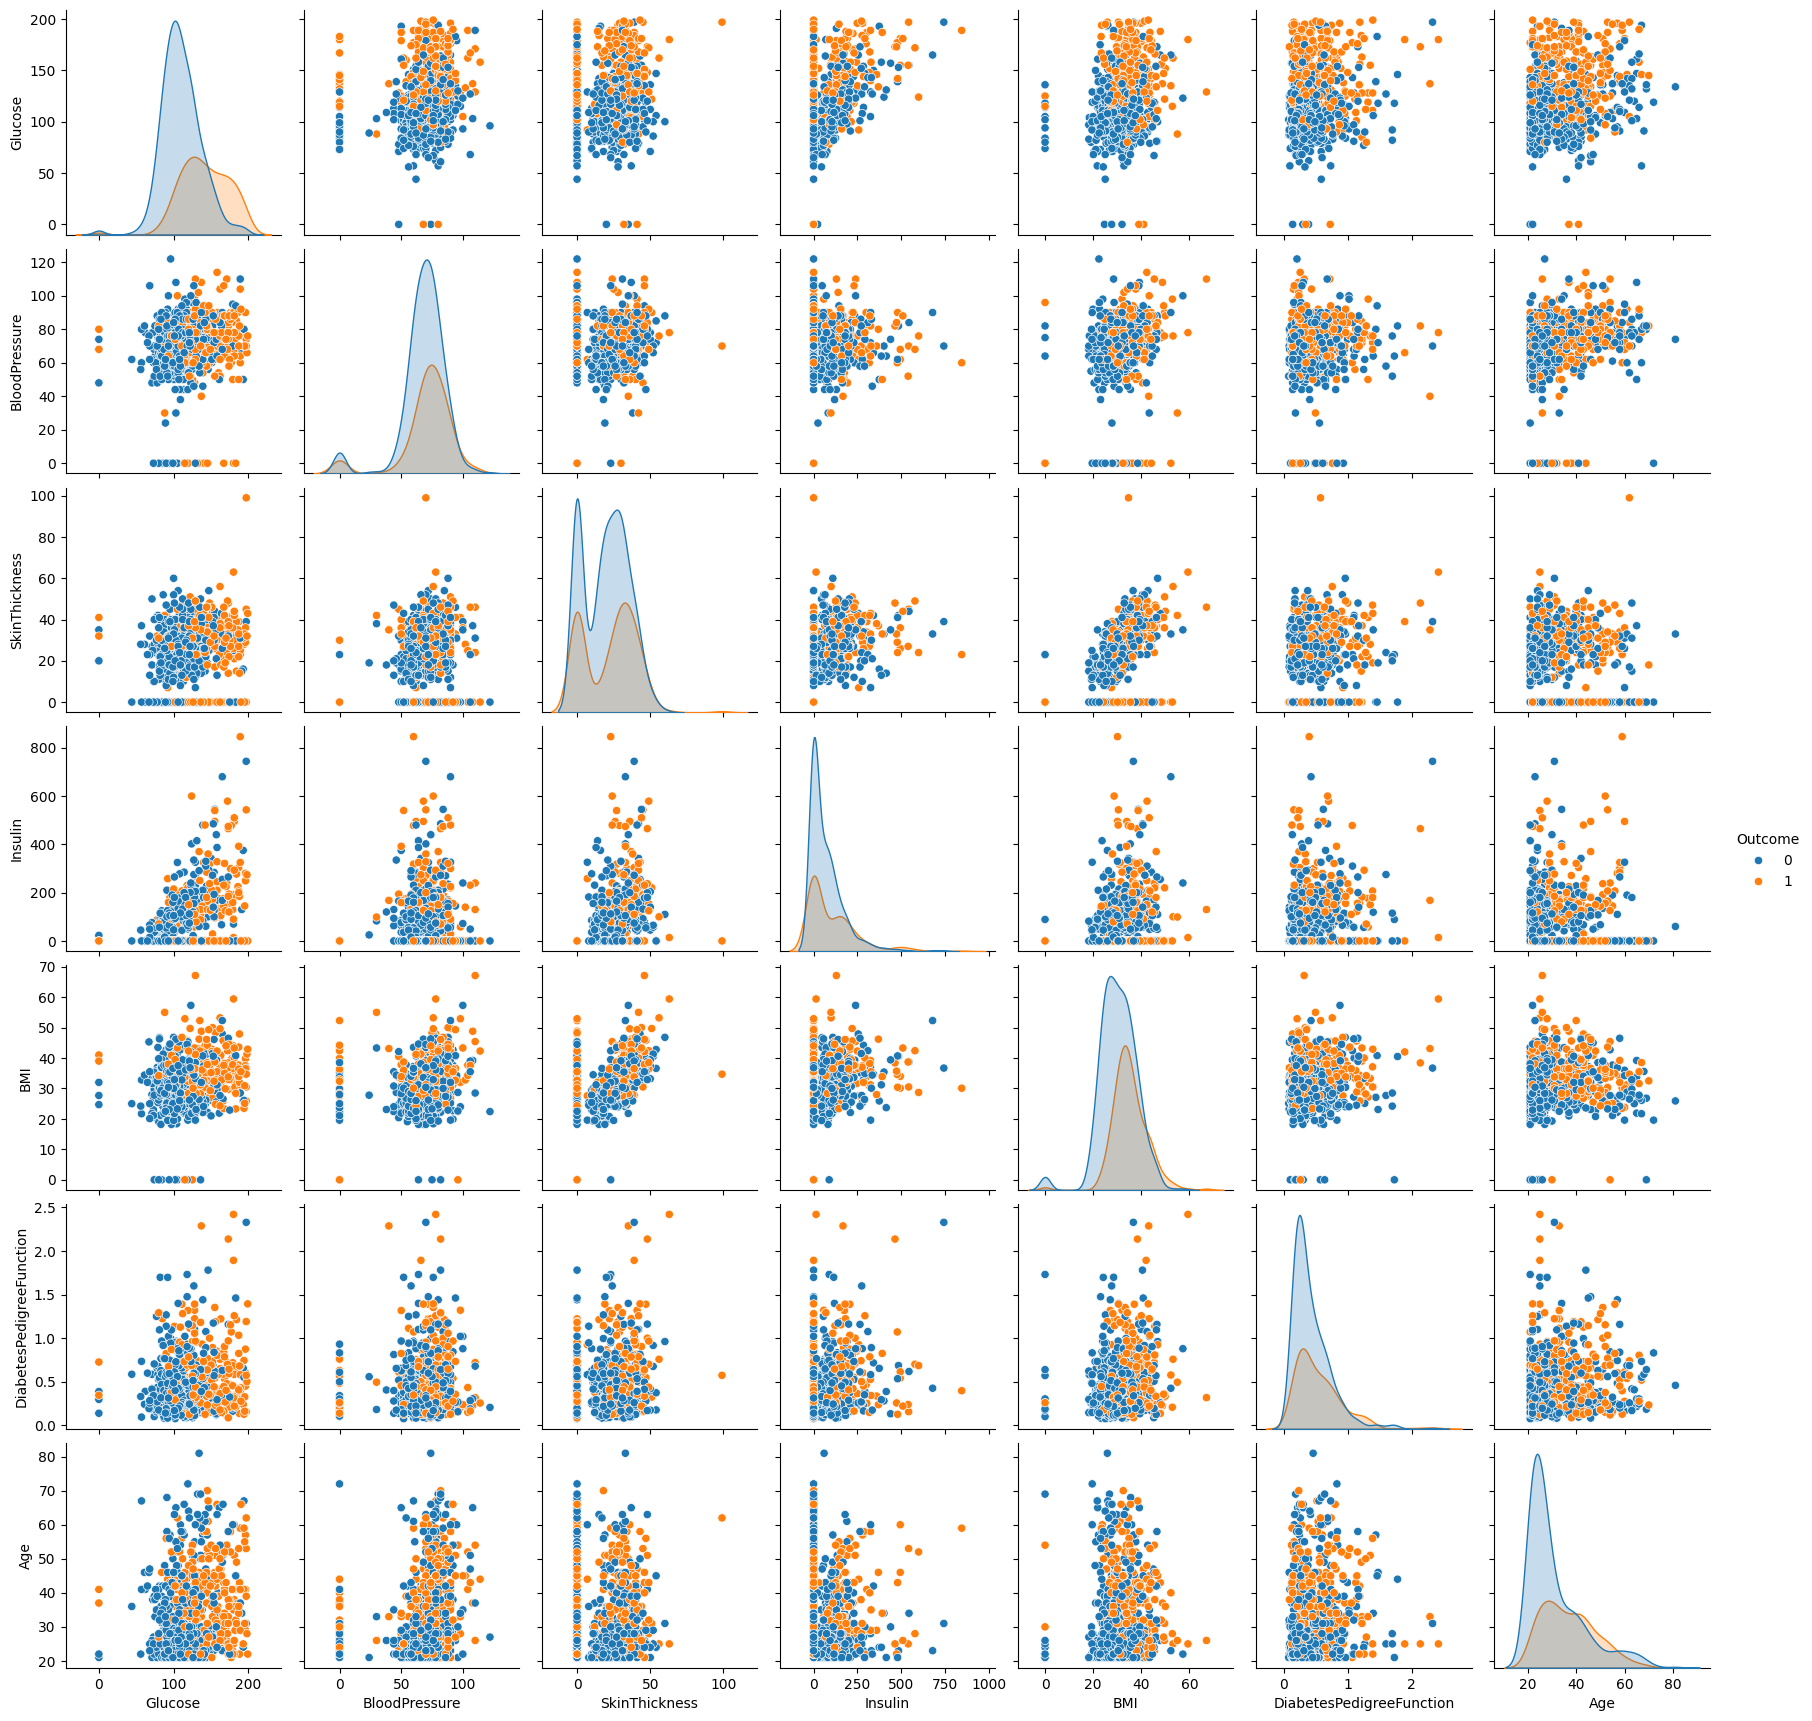

In [8]:
import seaborn as sns

sns.pairplot(dataset, hue='Outcome')  
plt.show()


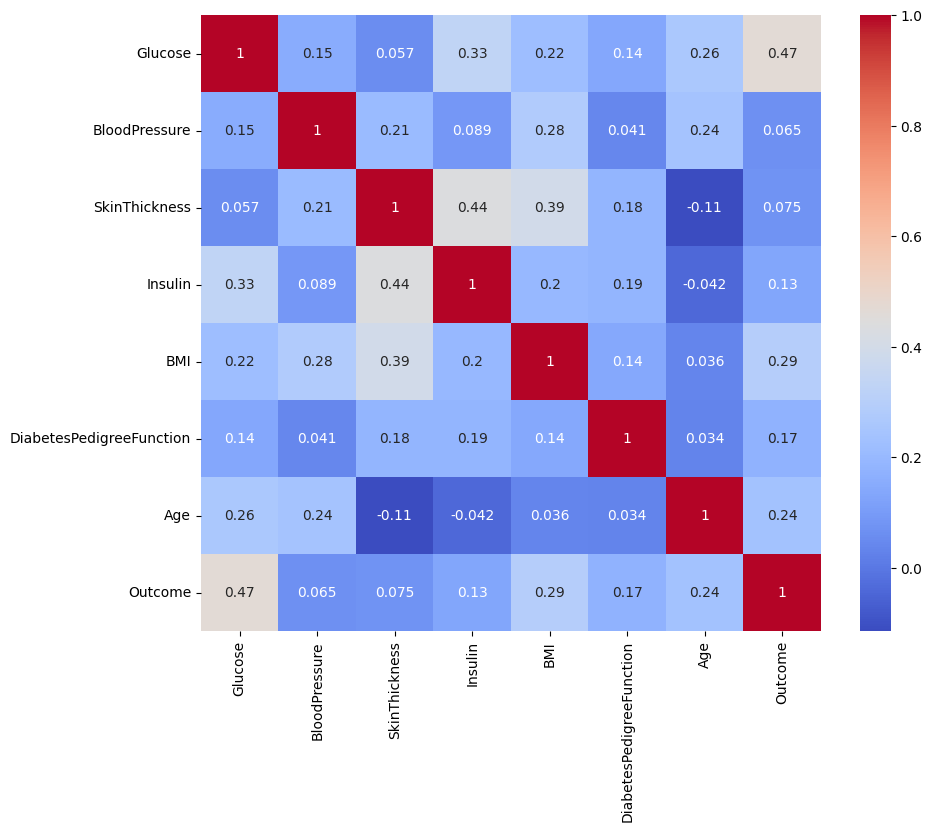

In [9]:
import seaborn as sns
corr = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [10]:
#separate parameters and target variable
x=dataset.iloc[:,:7].values
y=dataset.iloc[:,-1].values
print('X :',x.shape,x.dtype,'       Y :',y.shape,y.dtype, sep='   ')

X :   (768, 7)   float64          Y :   (768,)   int64


In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2,random_state=5)

In [46]:
model = svm.SVC(kernel='linear')
model.fit(xtrain, ytrain)

SVC(kernel='linear')

In [47]:
y_pred=model.predict(xtest)

In [48]:
model.score(xtest,ytest)

0.9487179487179487

In [15]:
import pickle
pickle.dump(model,open("diabetese.pkl",'wb'))

## confusion matrix of diabetese model

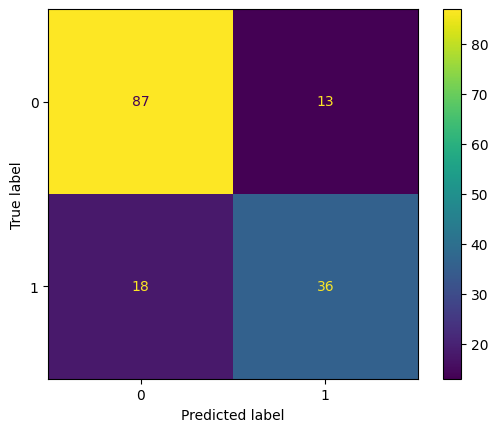

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [17]:
from sklearn.metrics import classification_report
report = classification_report(ytest, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.73      0.67      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



# Heart desease Model Training 

In [18]:
heart=pd.read_csv("heart.csv")
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [19]:
heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [20]:
heart.groupby('target').count()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
target                                                                         
0       138  138  138       138   138  138      138      138    138      138   
1       165  165  165       165   165  165      165      165    165      165   

        slope   ca  thal  
target                    
0         138  138   138  
1         165  165   165

In [21]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

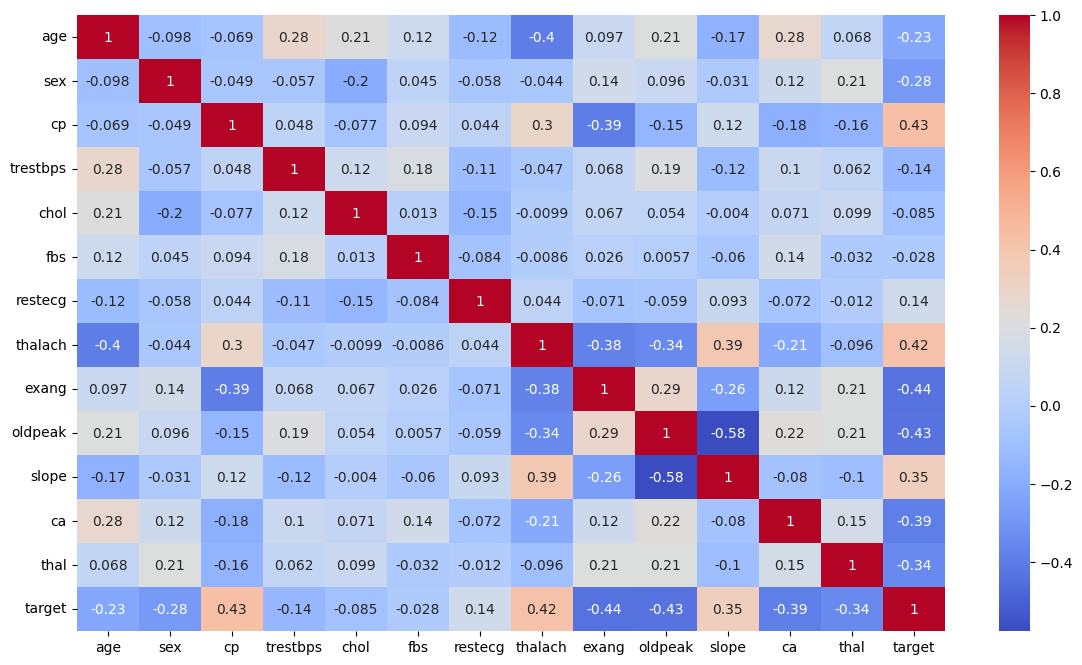

In [22]:
corr = heart.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

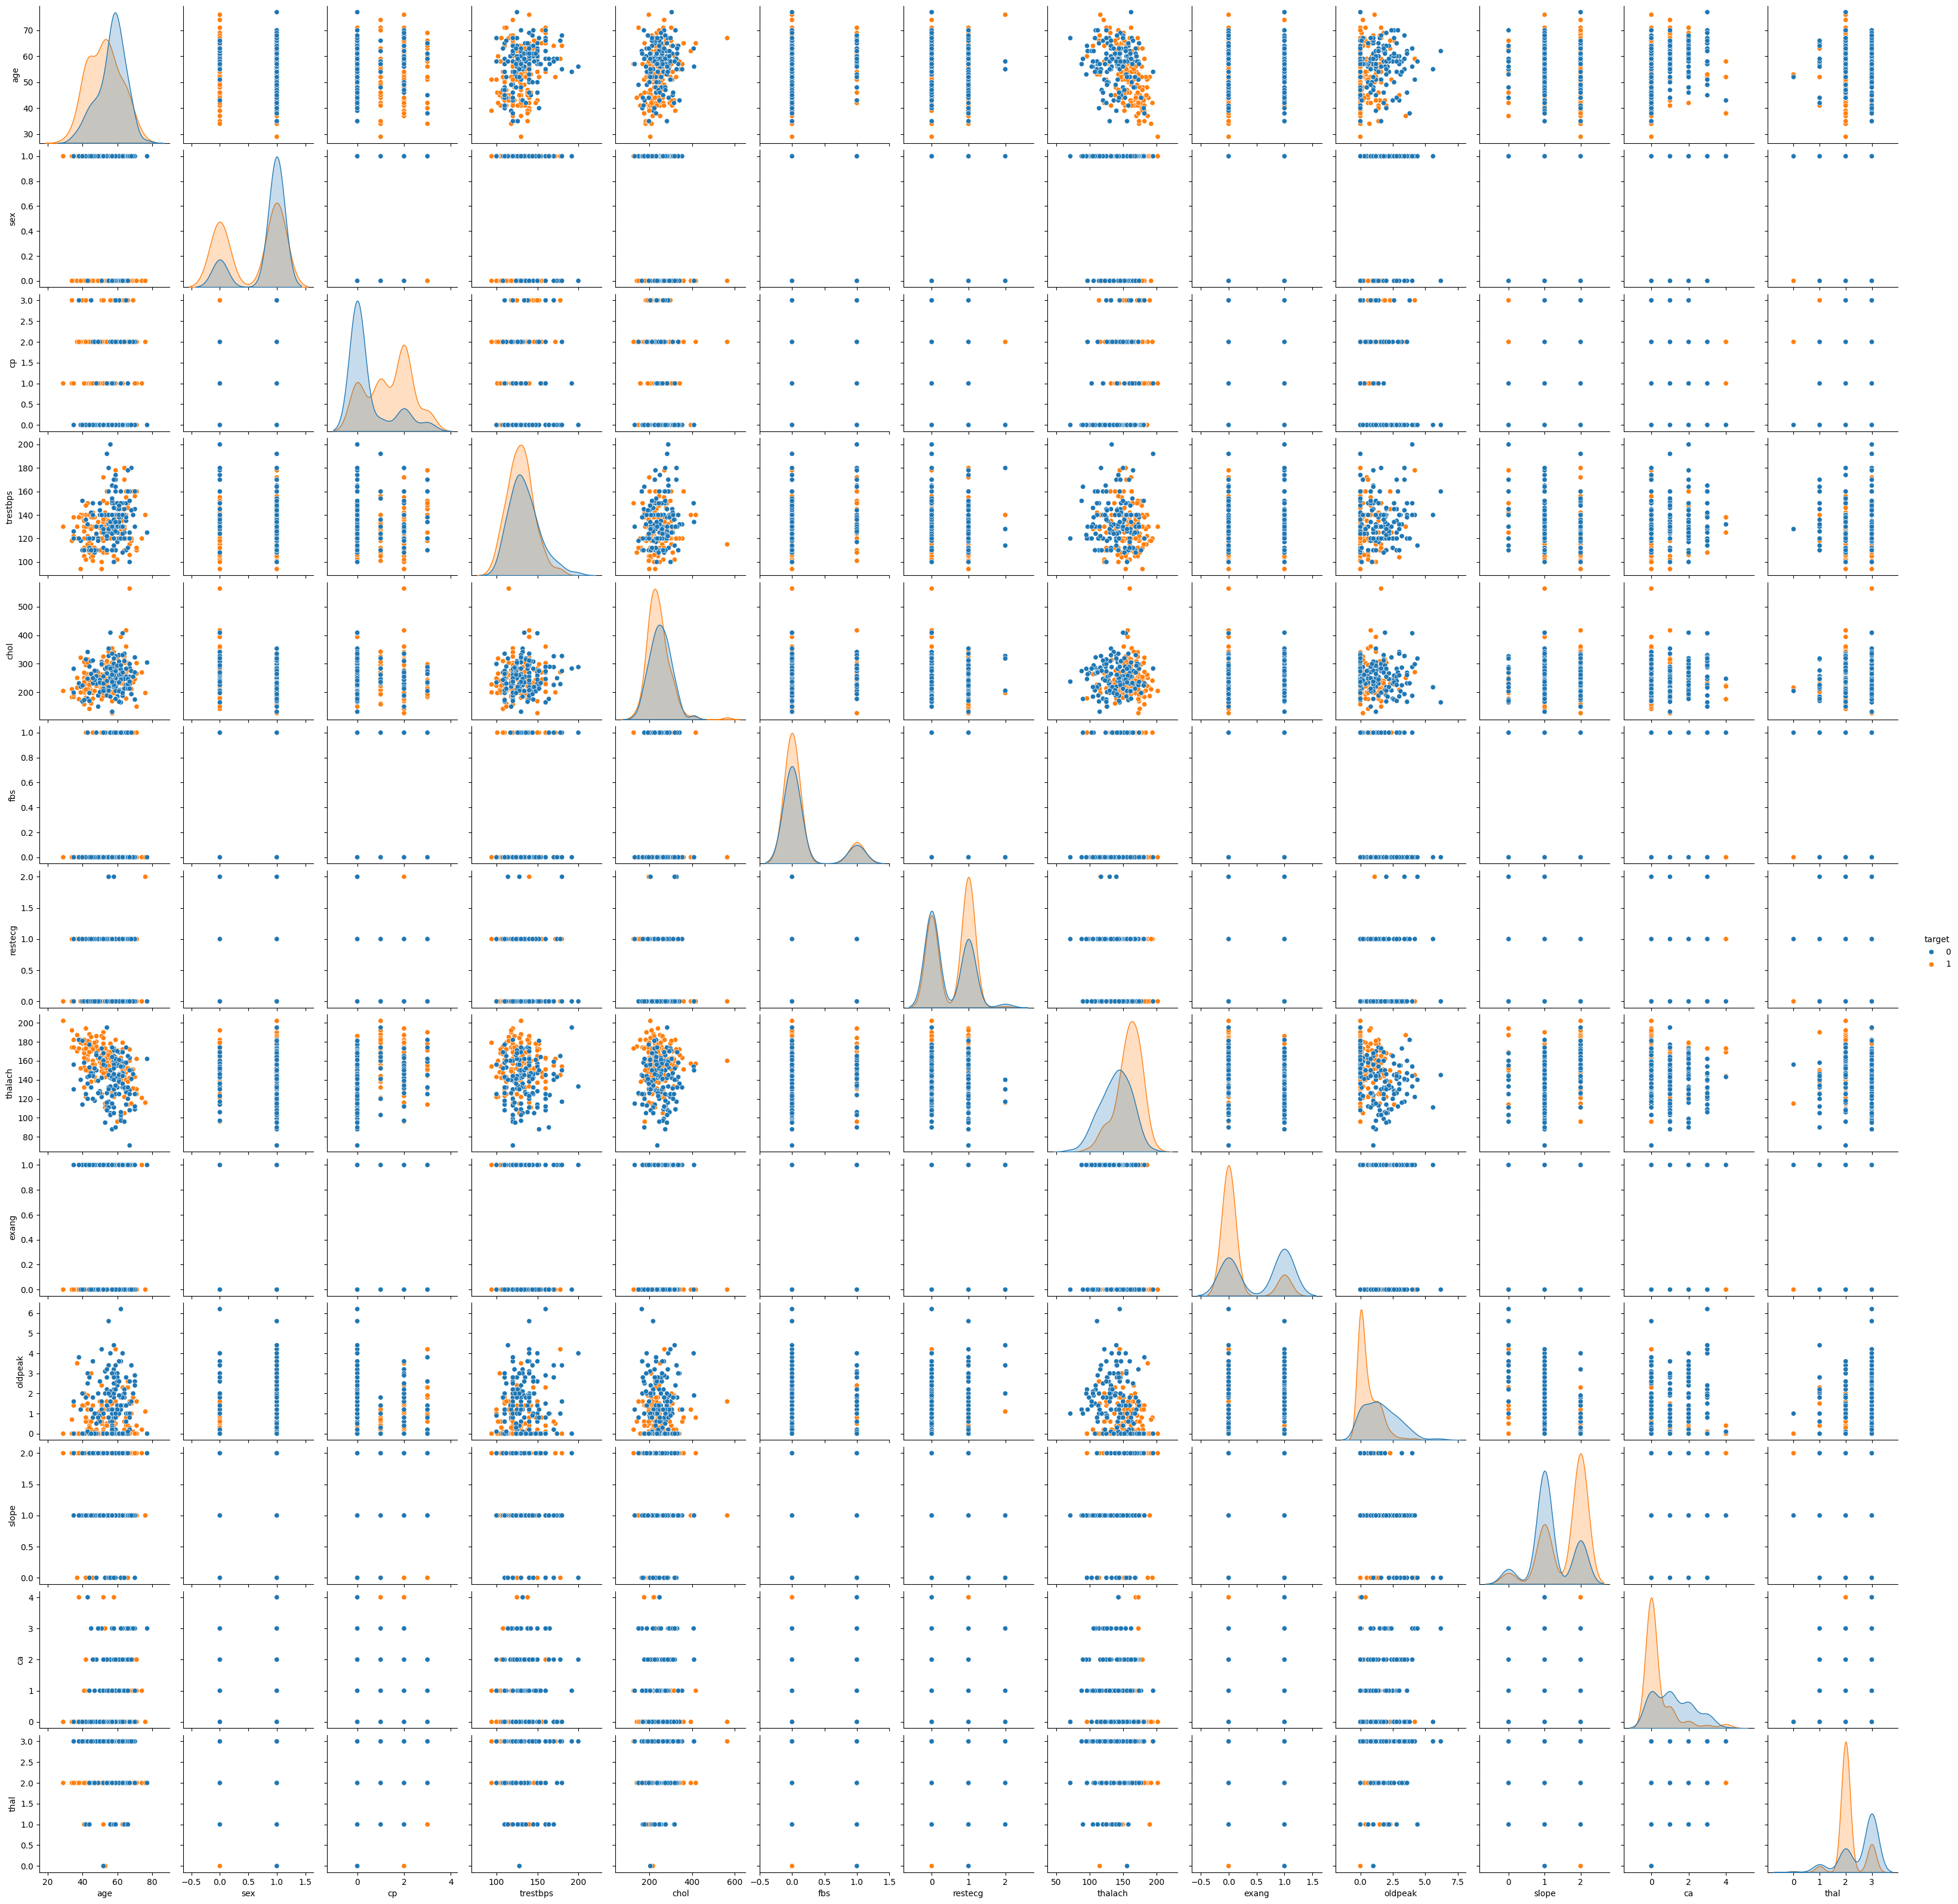

In [23]:
sns.pairplot(heart, hue='target')  
plt.show()

In [24]:
x1=heart.iloc[:,:13]
y1=heart.iloc[:,-1]
y1

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2,random_state=5)

In [26]:
model=svm.SVC(kernel="linear")
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [27]:
model.score(xtest,ytest)

0.9016393442622951

In [28]:
ypred=model.predict(xtest)

In [29]:
import pickle
pickle.dump(model,open("heart.pkl",'wb'))

## confusion matrix of heart disease model

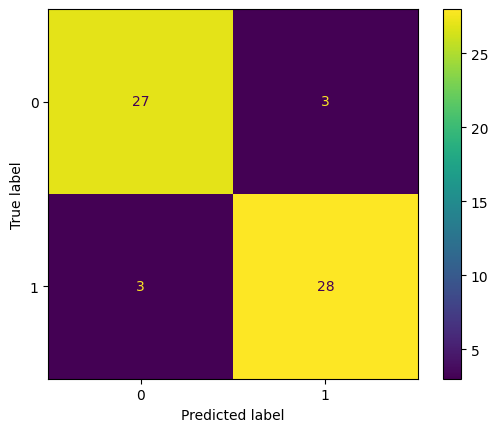

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ypred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [31]:
from sklearn.metrics import classification_report
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.90      0.90      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Parkinsons Disease Model training

In [32]:
parkinsons=pd.read_csv("parkinsons.csv")
parkinsons.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [33]:
parkinsons.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [34]:
parkinsons.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [35]:
x2=parkinsons.drop(['name','status'], axis=1)
y2=parkinsons['status']
x2

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
0               0.426  ...   0.02971      0.06545  0.02211  21.033  0.414783   
1               0.626  ...   0.04368      0.09403  0.01929  19.085  0.458359   
2               0.482  ...   0.03590      0.08270  0.01309  20.651  0.429895   
3               0.517  ...   0.03772      0.08771  0.01353  20.644  0.434969   
4               0.584  ...   0.04465      0.10470  0.01767  19.649  0.417356   
..                ...  ...       ...          ...      ...     ...       ...   
190             0.405  ...   0.02745      0.07008  0.02764  19.517  0.448439   
191             0.263  ...   0.01879      0.04812  0.01810  19.147  0.431674   
192             0.256  ...   0.01667      0.03804  0.10715  17.883  0.407567   
193             0.241  ...   0.01588      0.03794  0.07223  19.020  0.451221   
194             0.190  ...   0.01373      0.03078  0.04398  21.209  0.462803   

          DFA   spread1   spread2        D2       PPE  
0    0.815285 -4.813031  0.266482  2.301442  0.284654  
1    0.819521 -4.075192  0.335590  2.486855  0.368674  
2    0.825288 -4.443179  0.311173  2.342259  0.332634  
3    0.819235 -4.117501  0.334147  2.405554  0.368975  
4    0.823484 -3.747787  0.234513  2.332180  0.410335  
..        ...       ...       ...       ...       ...  
190  0.657899 -6.538586  0.121952  2.657476  0.133050  
191  0.683244 -6.195325  0.129303  2.784312  0.168895  
192  0.655683 -6.787197  0.158453  2.679772  0.131728  
193  0.643956 -6.744577  0.207454  2.138608  0.123306  
194  0.664357 -5.724056  0.190667  2.555477  0.148569  

[195 rows x 22 columns]

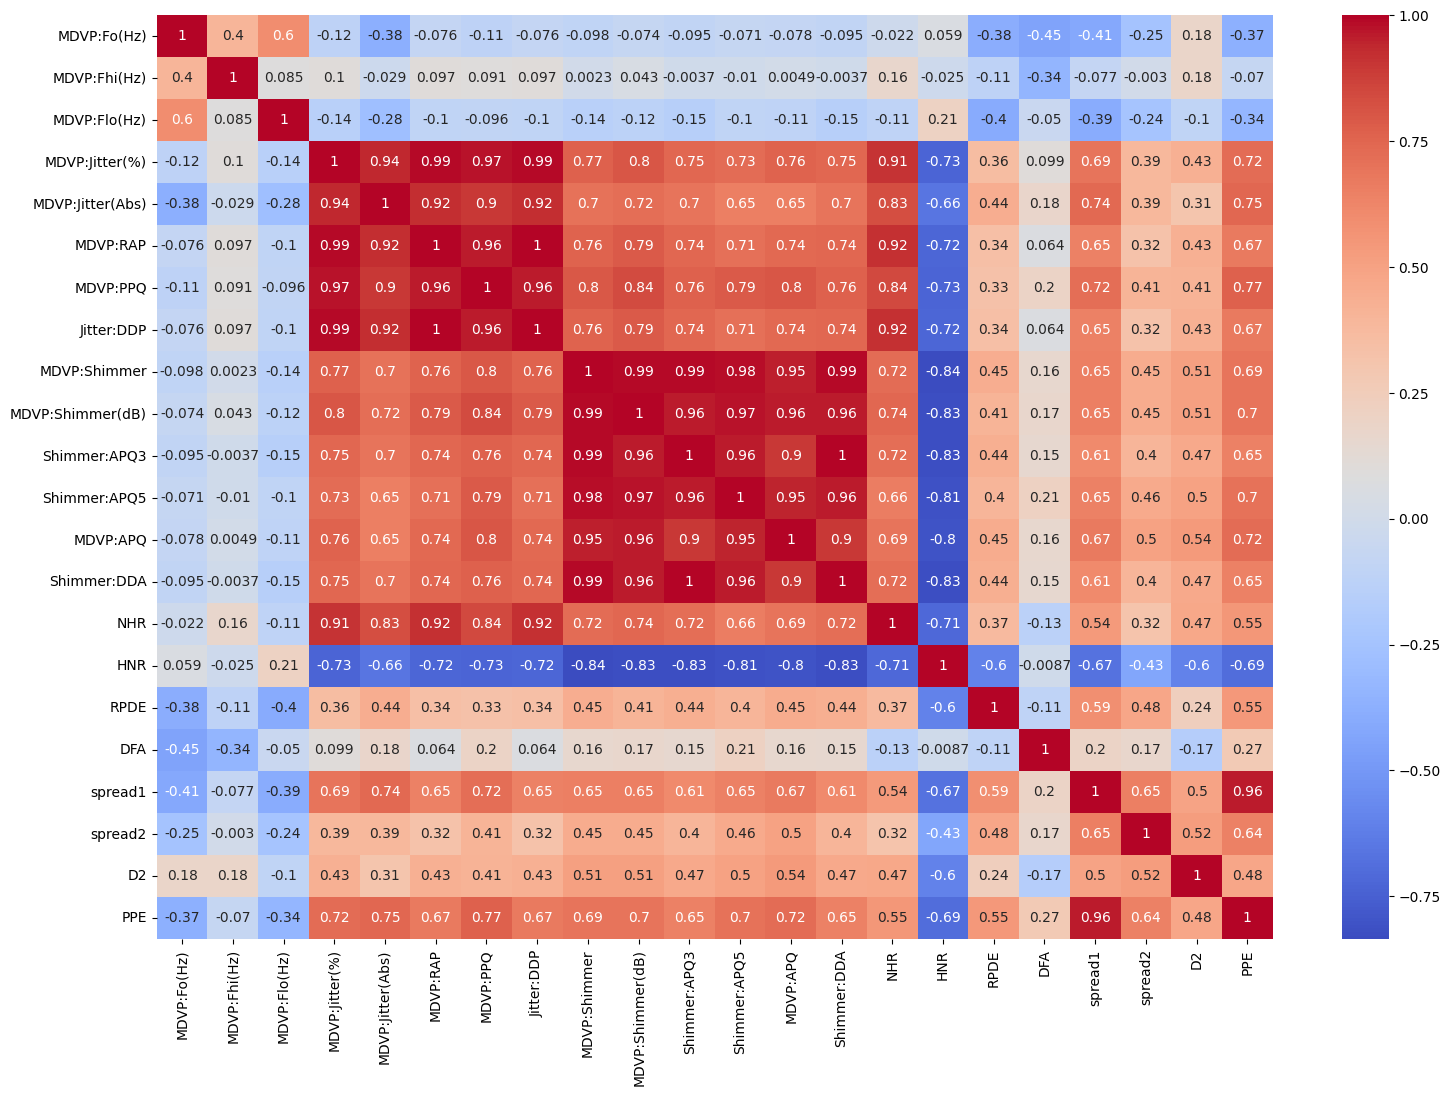

In [36]:
corr = x2.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y2,test_size=0.2,random_state=10)

In [38]:
model=svm.SVC(kernel="linear")
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [39]:
model.score(xtest,ytest)

0.9487179487179487

In [40]:
import pickle
pickle.dump(model,open("parkinsons.pkl",'wb'))

In [41]:
y_pred=model.predict(xtest)

## Confusion Matrix for parkinsons model

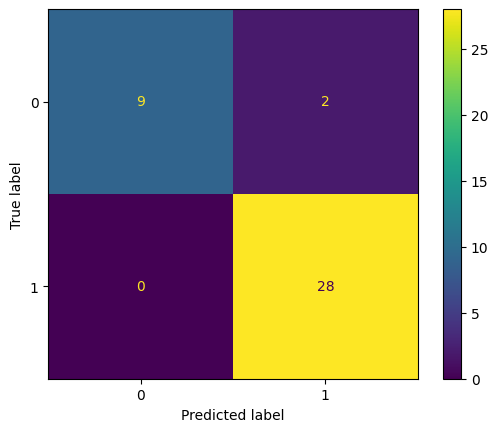

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [43]:
from sklearn.metrics import classification_report
report = classification_report(ytest, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.93      1.00      0.97        28

    accuracy                           0.95        39
   macro avg       0.97      0.91      0.93        39
weighted avg       0.95      0.95      0.95        39

